### Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and clean data

In [30]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [32]:
df = df.drop(columns=['MODELYEAR','MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'])
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


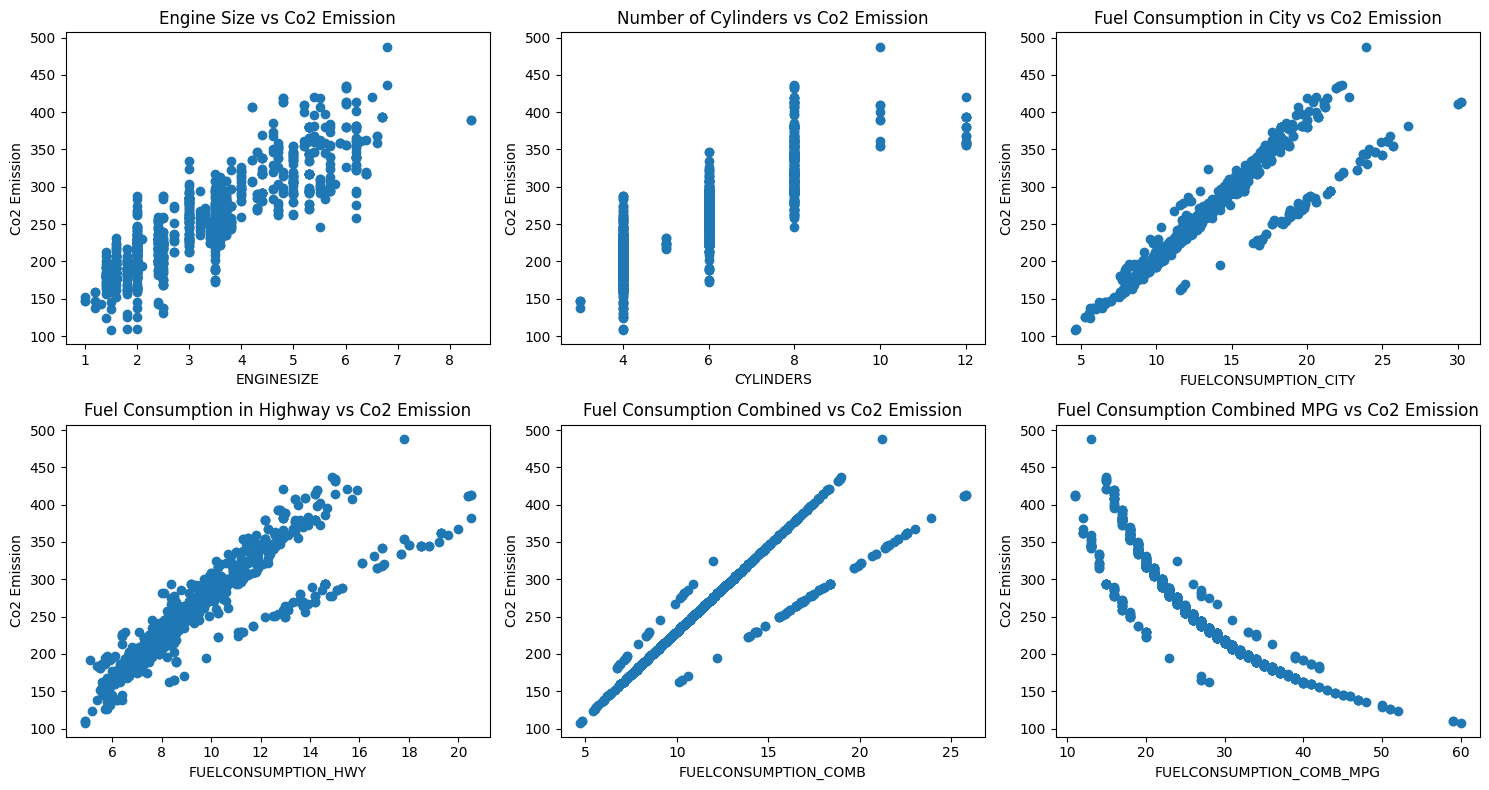

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

x_labels = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
            'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']
titles = ['Engine Size vs Co2 Emission', 'Number of Cylinders vs Co2 Emission', 
          'Fuel Consumption in City vs Co2 Emission', 
          'Fuel Consumption in Highway vs Co2 Emission', 
          'Fuel Consumption Combined vs Co2 Emission',
          'Fuel Consumption Combined MPG vs Co2 Emission']

axes = axes.flatten()  # Convert 2D array to 1D for easy iteration

for i in range(6):  
    axes[i].scatter(df[x_labels[i]], df['CO2EMISSIONS'])
    axes[i].set_xlabel(x_labels[i])
    axes[i].set_ylabel('Co2 Emission')
    axes[i].set_title(titles[i])

# Remove any unused subplots (if any)
for j in range(6, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Modeling

In [59]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [61]:
from sklearn.model_selection import train_test_split
X = cdf [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].values
y = cdf [['CO2EMISSIONS']].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)

In [67]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[ 9.75670096  7.20902613 10.36988138]]
Intercept:  [62.1602047]


In [69]:
y_hat = reg.predict(X_test)

### Evaluation

In [72]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_hat) )

Mean absolute error: 15.99
Residual sum of squares (MSE): 508.03
R2-score: 0.87
